In [1]:
print("Hello, this is my Financial Inclusion Project!")

Hello, this is my Financial Inclusion Project!


In [2]:
!pip install xgboost shap imbalanced-learn openpyxl

print("Installation Done!")

Installation Done!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

df = pd.read_excel(url, header=1)

print("Dataset loaded successfully!")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Dataset loaded successfully!
Total Rows: 30000
Total Columns: 25


In [5]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
print("=== DATASET INFORMATION ===")
print(f"Total People: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"\nColumn Names:")
for col in df.columns:
    print(f"  → {col}")

=== DATASET INFORMATION ===
Total People: 30000
Total Columns: 25

Column Names:
  → ID
  → LIMIT_BAL
  → SEX
  → EDUCATION
  → MARRIAGE
  → AGE
  → PAY_0
  → PAY_2
  → PAY_3
  → PAY_4
  → PAY_5
  → PAY_6
  → BILL_AMT1
  → BILL_AMT2
  → BILL_AMT3
  → BILL_AMT4
  → BILL_AMT5
  → BILL_AMT6
  → PAY_AMT1
  → PAY_AMT2
  → PAY_AMT3
  → PAY_AMT4
  → PAY_AMT5
  → PAY_AMT6
  → default payment next month


In [7]:
print("=== MISSING VALUES IN EACH COLUMN ===")
print(df.isnull().sum())

print(f"\n=== TOTAL MISSING VALUES ===")
print(f"Total Missing Values: {df.isnull().sum().sum()}")

print(f"\n=== DATA TYPES ===")
print(df.dtypes)

=== MISSING VALUES IN EACH COLUMN ===
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

=== TOTAL MISSING VALUES ===
Total Missing Values: 0

=== DATA TYPES ===
ID                            int64
LIMIT_BAL                     int64
SEX

In [8]:
# Checking class distribution
print("=== CLASS DISTRIBUTION ===")
print(df['default payment next month'].value_counts())

print(f"\n0 = Will NOT default (Good customer)")
print(f"1 = WILL default (Bad customer)")

print(f"\n=== PERCENTAGE ===")
print(f"Good Customers: {df['default payment next month'].value_counts()[0]/len(df)*100:.2f}%")
print(f"Bad Customers:  {df['default payment next month'].value_counts()[1]/len(df)*100:.2f}%")

=== CLASS DISTRIBUTION ===
default payment next month
0    23364
1     6636
Name: count, dtype: int64

0 = Will NOT default (Good customer)
1 = WILL default (Bad customer)

=== PERCENTAGE ===
Good Customers: 77.88%
Bad Customers:  22.12%


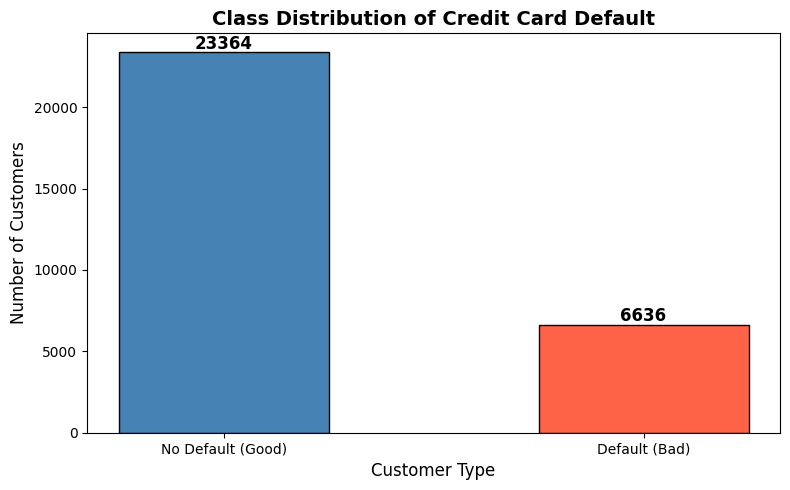

Graph saved as class_distribution.png!


In [9]:
# Plotting class distribution
plt.figure(figsize=(8, 5))

colors = ['steelblue', 'tomato']
labels = ['No Default (Good)', 'Default (Bad)']
values = df['default payment next month'].value_counts()

plt.bar(labels, values, color=colors, edgecolor='black', width=0.5)

plt.title('Class Distribution of Credit Card Default',
          fontsize=14, fontweight='bold')
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for i, v in enumerate(values):
    plt.text(i, v + 200, str(v), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=150)
plt.show()

print("Graph saved as class_distribution.png!")

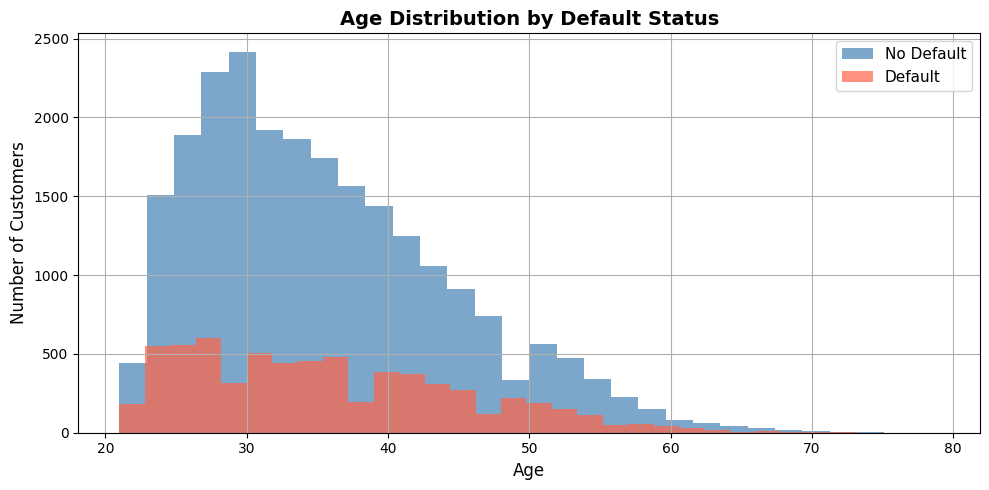

Age distribution graph saved!


In [10]:
# EDA - Age Distribution by Default Status
plt.figure(figsize=(10, 5))

df[df['default payment next month']==0]['AGE'].hist(
    bins=30, alpha=0.7, color='steelblue', label='No Default')

df[df['default payment next month']==1]['AGE'].hist(
    bins=30, alpha=0.7, color='tomato', label='Default')

plt.title('Age Distribution by Default Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('age_distribution.png', dpi=150)
plt.show()

print("Age distribution graph saved!")

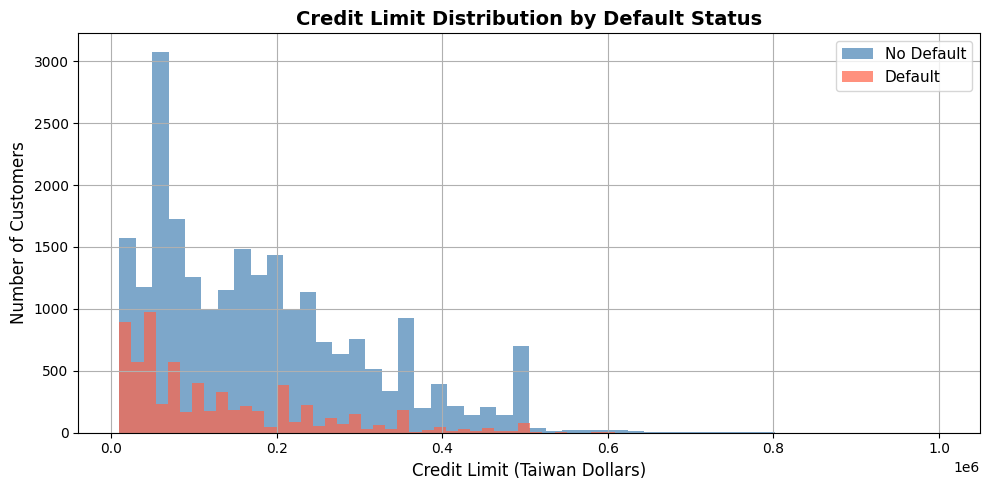

Credit limit distribution graph saved!


In [13]:
# EDA - Credit Limit Distribution by Default Status
plt.figure(figsize=(10, 5))

df[df['default payment next month']==0]['LIMIT_BAL'].hist(
    bins=50, alpha=0.7, color='steelblue', label='No Default')

df[df['default payment next month']==1]['LIMIT_BAL'].hist(
    bins=50, alpha=0.7, color='tomato', label='Default')

plt.title('Credit Limit Distribution by Default Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Credit Limit (Taiwan Dollars)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('credit_limit_distribution.png', dpi=150)
plt.show()

print("Credit limit distribution graph saved!")

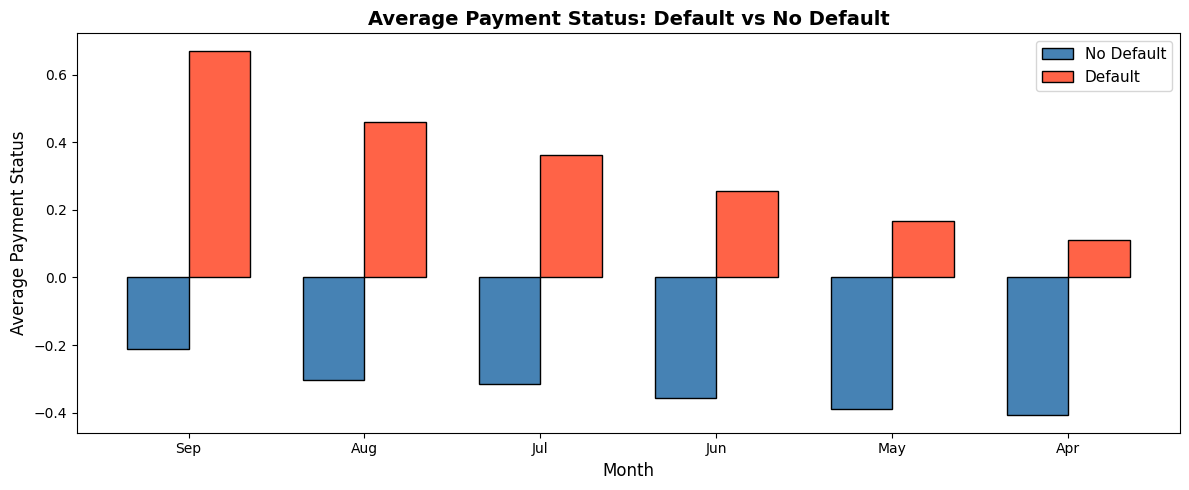

Payment status graph saved!


In [14]:
# EDA - Payment Status Analysis
plt.figure(figsize=(12, 5))

# Average payment status for defaulters vs non-defaulters
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
months = ['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr']

no_default = df[df['default payment next month']==0][pay_cols].mean()
default = df[df['default payment next month']==1][pay_cols].mean()

x = range(len(pay_cols))
width = 0.35

plt.bar([i - width/2 for i in x], no_default,
        width, label='No Default', color='steelblue', edgecolor='black')
plt.bar([i + width/2 for i in x], default,
        width, label='Default', color='tomato', edgecolor='black')

plt.title('Average Payment Status: Default vs No Default',
          fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Payment Status', fontsize=12)
plt.xticks(x, months)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('payment_status.png', dpi=150)
plt.show()

print("Payment status graph saved!")

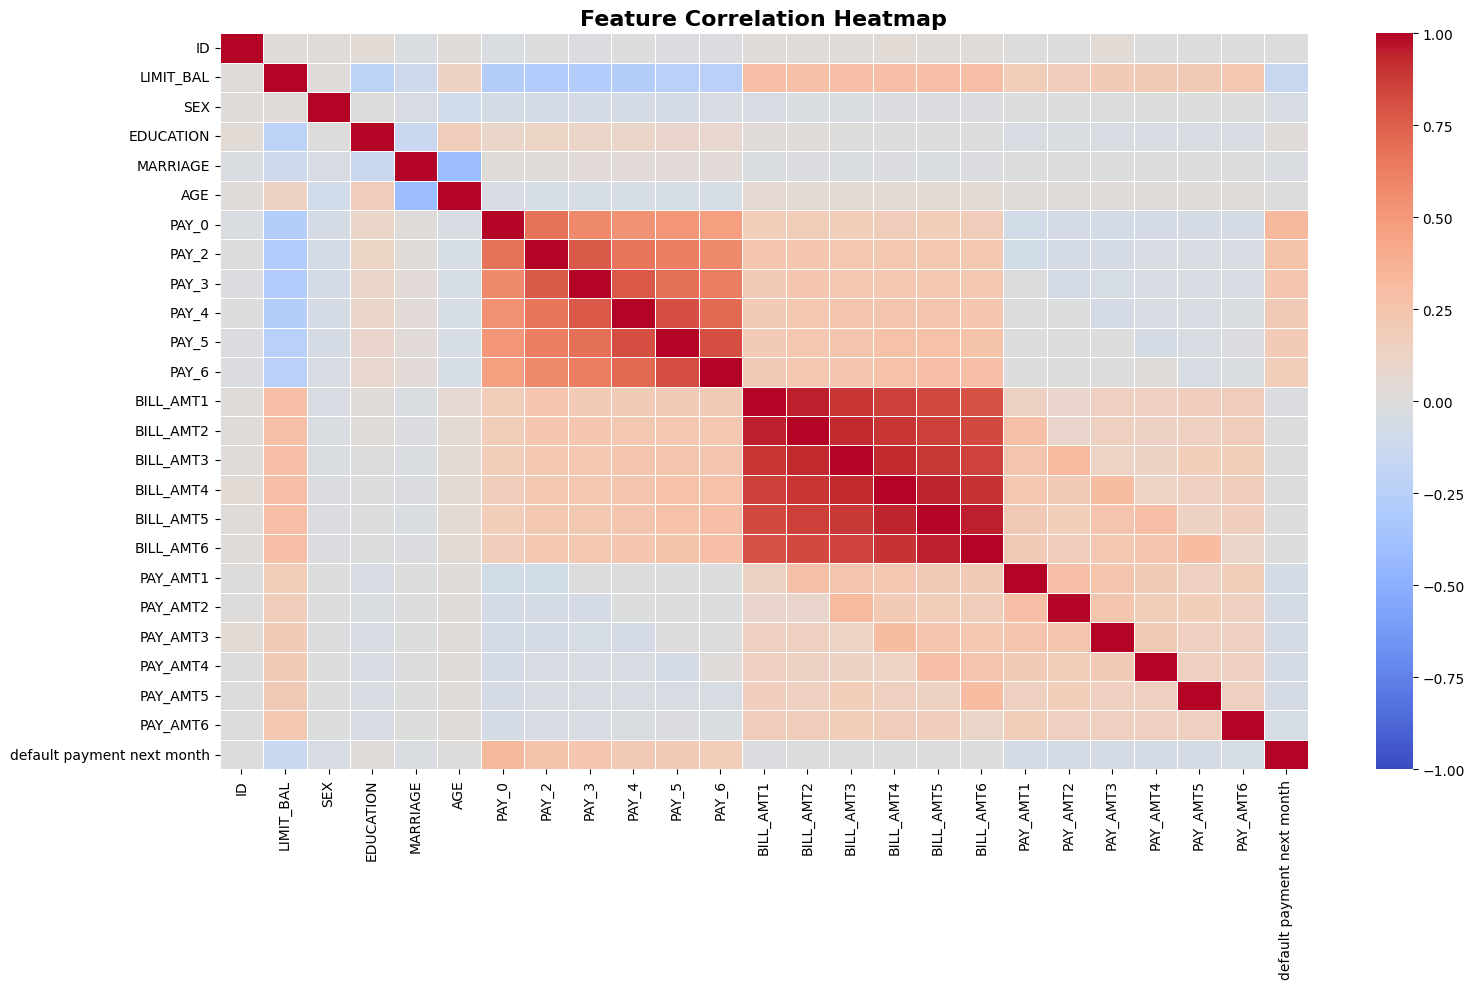

Correlation heatmap saved!


In [15]:
# EDA - Correlation Heatmap
plt.figure(figsize=(16, 10))

corr_matrix = df.corr()

sns.heatmap(corr_matrix,
            annot=False,
            cmap='coolwarm',
            linewidths=0.5,
            vmin=-1,
            vmax=1)

plt.title('Feature Correlation Heatmap',
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
plt.show()

print("Correlation heatmap saved!")

In [16]:
# FEATURE ENGINEERING - Step 1
# Fix wrong values in EDUCATION column
# Only valid values are 1,2,3,4
# Values 0,5,6 are undocumented - replace with 4 (others)

print("=== BEFORE FIXING EDUCATION ===")
print(df['EDUCATION'].value_counts())

df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

print("\n=== AFTER FIXING EDUCATION ===")
print(df['EDUCATION'].value_counts())

=== BEFORE FIXING EDUCATION ===
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

=== AFTER FIXING EDUCATION ===
EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


In [17]:
# FEATURE ENGINEERING - Step 2
# Fix wrong values in MARRIAGE column
# Only valid values are 1,2,3
# Value 0 is undocumented - replace with 3 (others)

print("=== BEFORE FIXING MARRIAGE ===")
print(df['MARRIAGE'].value_counts())

df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

print("\n=== AFTER FIXING MARRIAGE ===")
print(df['MARRIAGE'].value_counts())

=== BEFORE FIXING MARRIAGE ===
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

=== AFTER FIXING MARRIAGE ===
MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


In [18]:
# FEATURE ENGINEERING - Step 3
# Drop ID column (it is just a number, not useful for prediction)
# Rename target column to something simpler

df.drop('ID', axis=1, inplace=True)

df.rename(columns={'default payment next month': 'default'}, inplace=True)

print("=== AFTER CLEANING ===")
print(f"Total Columns Now: {df.shape[1]}")
print(f"\nColumn Names:")
for col in df.columns:
    print(f"  → {col}")

=== AFTER CLEANING ===
Total Columns Now: 24

Column Names:
  → LIMIT_BAL
  → SEX
  → EDUCATION
  → MARRIAGE
  → AGE
  → PAY_0
  → PAY_2
  → PAY_3
  → PAY_4
  → PAY_5
  → PAY_6
  → BILL_AMT1
  → BILL_AMT2
  → BILL_AMT3
  → BILL_AMT4
  → BILL_AMT5
  → BILL_AMT6
  → PAY_AMT1
  → PAY_AMT2
  → PAY_AMT3
  → PAY_AMT4
  → PAY_AMT5
  → PAY_AMT6
  → default


In [19]:
# FEATURE ENGINEERING - Step 4
# Creating new useful columns

# 1. Average payment delay across all 6 months
df['AVG_PAY_DELAY'] = df[['PAY_0','PAY_2','PAY_3',
                           'PAY_4','PAY_5','PAY_6']].mean(axis=1)

# 2. Average bill amount across all 6 months
df['AVG_BILL_AMT'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3',
                          'BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

# 3. Average payment amount across all 6 months
df['AVG_PAY_AMT'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3',
                         'PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)

# 4. Payment ratio (how much they paid vs how much they owed)
df['PAY_RATIO'] = df['AVG_PAY_AMT'] / (df['AVG_BILL_AMT'] + 1)

print("=== NEW COLUMNS CREATED ===")
print(f"Total Columns Now: {df.shape[1]}")
print(f"\nNew Columns Added:")
print(f"  → AVG_PAY_DELAY: {df['AVG_PAY_DELAY'].mean():.2f}")
print(f"  → AVG_BILL_AMT:  {df['AVG_BILL_AMT'].mean():.2f}")
print(f"  → AVG_PAY_AMT:   {df['AVG_PAY_AMT'].mean():.2f}")
print(f"  → PAY_RATIO:     {df['PAY_RATIO'].mean():.2f}")

=== NEW COLUMNS CREATED ===
Total Columns Now: 28

New Columns Added:
  → AVG_PAY_DELAY: -0.18
  → AVG_BILL_AMT:  44976.95
  → AVG_PAY_AMT:   5275.23
  → PAY_RATIO:     3.77


In [20]:
# Separating Features (X) and Target (y)

X = df.drop('default', axis=1)
y = df['default']

print("=== FEATURES AND TARGET SEPARATED ===")
print(f"Features (X) Shape: {X.shape}")
print(f"Target (y) Shape:   {y.shape}")

print(f"\nFeatures (X) = All columns EXCEPT default")
print(f"Target (y)   = Only the default column")

print(f"\nTarget Distribution:")
print(f"  No Default (0): {(y==0).sum()}")
print(f"  Default    (1): {(y==1).sum()}")

=== FEATURES AND TARGET SEPARATED ===
Features (X) Shape: (30000, 27)
Target (y) Shape:   (30000,)

Features (X) = All columns EXCEPT default
Target (y)   = Only the default column

Target Distribution:
  No Default (0): 23364
  Default    (1): 6636


In [22]:
# Applying SMOTE to fix class imbalance
from imblearn.over_sampling import SMOTE
import numpy as np

# Handle potential infinite values resulting from division by zero in PAY_RATIO
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True) # Replace NaNs (from inf or other sources) with 0

print("=== BEFORE SMOTE ===")
print(f"No Default (0): {(y==0).sum()}")
print(f"Default    (1): {(y==1).sum()}")

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n=== AFTER SMOTE ===")
print(f"No Default (0): {(y_resampled==0).sum()}")
print(f"Default    (1): {(y_resampled==1).sum()}")
print(f"\nTotal Records Now: {len(y_resampled)}")

=== BEFORE SMOTE ===
No Default (0): 23364
Default    (1): 6636

=== AFTER SMOTE ===
No Default (0): 23364
Default    (1): 23364

Total Records Now: 46728


In [23]:
# Splitting data into Training and Testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled)

print("=== TRAIN TEST SPLIT ===")
print(f"Training Set:  {X_train.shape[0]} records (80%)")
print(f"Testing Set:   {X_test.shape[0]} records (20%)")

print(f"\nTraining Target Distribution:")
print(f"  No Default (0): {(y_train==0).sum()}")
print(f"  Default    (1): {(y_train==1).sum()}")

print(f"\nTesting Target Distribution:")
print(f"  No Default (0): {(y_test==0).sum()}")
print(f"  Default    (1): {(y_test==1).sum()}")

=== TRAIN TEST SPLIT ===
Training Set:  37382 records (80%)
Testing Set:   9346 records (20%)

Training Target Distribution:
  No Default (0): 18691
  Default    (1): 18691

Testing Target Distribution:
  No Default (0): 4673
  Default    (1): 4673


In [24]:
# Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== FEATURE SCALING DONE ===")
print(f"Training Set Scaled Shape: {X_train_scaled.shape}")
print(f"Testing Set Scaled Shape:  {X_test_scaled.shape}")

print(f"\nBefore Scaling (LIMIT_BAL):")
print(f"  Min: {X_train['LIMIT_BAL'].min()}")
print(f"  Max: {X_train['LIMIT_BAL'].max()}")

print(f"\nAfter Scaling (LIMIT_BAL):")
print(f"  Min: {X_train_scaled[:,0].min():.2f}")
print(f"  Max: {X_train_scaled[:,0].max():.2f}")

=== FEATURE SCALING DONE ===
Training Set Scaled Shape: (37382, 27)
Testing Set Scaled Shape:  (9346, 27)

Before Scaling (LIMIT_BAL):
  Min: 10000
  Max: 1000000

After Scaling (LIMIT_BAL):
  Min: -1.14
  Max: 6.77


In [25]:
# Training Model 1 - Logistic Regression (Baseline)
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression...")
print("Please wait...")

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Trained Successfully!")

Training Logistic Regression...
Please wait...
Logistic Regression Trained Successfully!


In [26]:
# Training Model 2 - Random Forest
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest...")
print("Please wait... (may take 1-2 minutes)")

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1)

rf_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Trained Successfully!")

Training Random Forest...
Please wait... (may take 1-2 minutes)
Random Forest Trained Successfully!


In [27]:
# Training Model 3 - XGBoost (Our Best Model)
from xgboost import XGBClassifier

print("Training XGBoost...")
print("Please wait...")

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False)

xgb_model.fit(X_train_scaled, y_train)

xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("XGBoost Trained Successfully!")

Training XGBoost...
Please wait...
XGBoost Trained Successfully!


In [28]:
# Evaluating all 3 models
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             roc_auc_score)

def evaluate_model(name, y_true, y_pred, y_prob):
    return {
        'Model': name,
        'Accuracy':  round(accuracy_score(y_true, y_pred), 3),
        'Precision': round(precision_score(y_true, y_pred), 3),
        'Recall':    round(recall_score(y_true, y_pred), 3),
        'F1-Score':  round(f1_score(y_true, y_pred), 3),
        'AUC-ROC':   round(roc_auc_score(y_true, y_prob), 3)
    }

results = []
results.append(evaluate_model("Logistic Regression",
                               y_test, lr_pred, lr_prob))
results.append(evaluate_model("Random Forest",
                               y_test, rf_pred, rf_prob))
results.append(evaluate_model("XGBoost",
                               y_test, xgb_pred, xgb_prob))

results_df = pd.DataFrame(results)

print("=== MODEL PERFORMANCE COMPARISON ===")
print(results_df.to_string(index=False))

=== MODEL PERFORMANCE COMPARISON ===
              Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logistic Regression     0.722      0.725   0.715     0.720    0.790
      Random Forest     0.862      0.886   0.832     0.858    0.931
            XGBoost     0.836      0.865   0.795     0.829    0.914


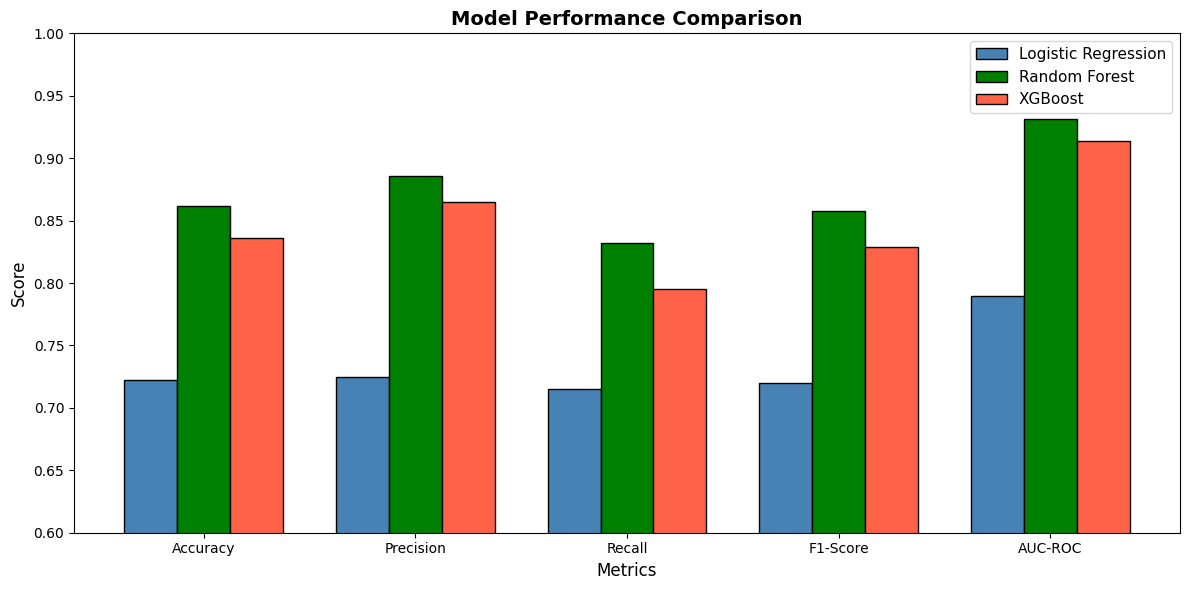

Model comparison graph saved!


In [29]:
# Visualizing model comparison
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = range(len(metrics))
width = 0.25

bars1 = ax.bar([i - width for i in x],
               results_df[results_df['Model']=='Logistic Regression'][metrics].values[0],
               width, label='Logistic Regression',
               color='steelblue', edgecolor='black')

bars2 = ax.bar([i for i in x],
               results_df[results_df['Model']=='Random Forest'][metrics].values[0],
               width, label='Random Forest',
               color='green', edgecolor='black')

bars3 = ax.bar([i + width for i in x],
               results_df[results_df['Model']=='XGBoost'][metrics].values[0],
               width, label='XGBoost',
               color='tomato', edgecolor='black')

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.set_ylim(0.6, 1.0)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150)
plt.show()

print("Model comparison graph saved!")

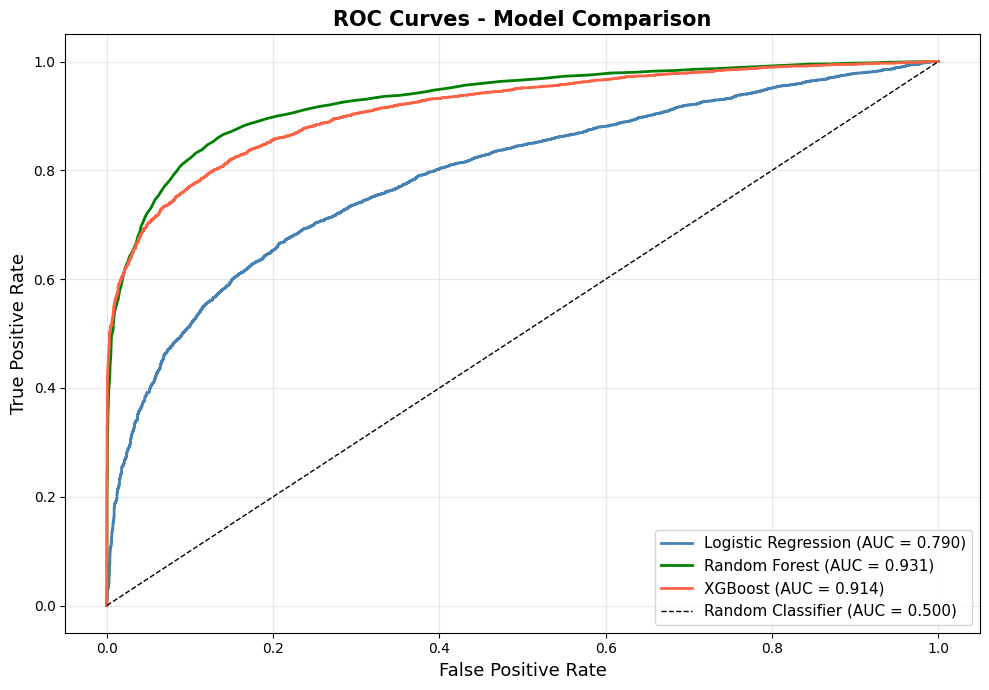

ROC curves saved!


In [30]:
# Plotting ROC Curves for all 3 models
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 7))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
plt.plot(fpr_lr, tpr_lr, color='steelblue', lw=2,
         label=f'Logistic Regression (AUC = 0.790)')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2,
         label=f'Random Forest (AUC = 0.931)')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
plt.plot(fpr_xgb, tpr_xgb, color='tomato', lw=2,
         label=f'XGBoost (AUC = 0.914)')

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=1,
         label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curves - Model Comparison',
          fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=150)
plt.show()

print("ROC curves saved!")


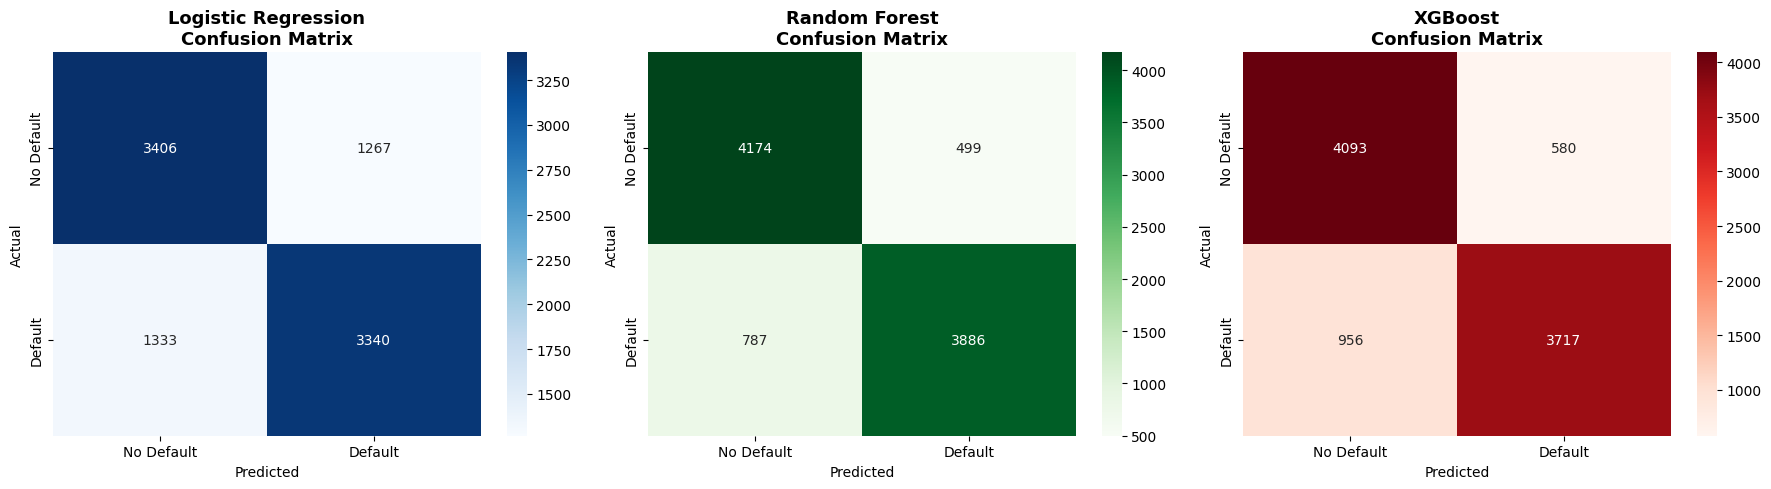

Confusion matrices saved!


In [31]:
# Plotting Confusion Matrices for all 3 models
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [lr_pred, rf_pred, xgb_pred]
colors = ['Blues', 'Greens', 'Reds']

for ax, name, pred, cmap in zip(axes, model_names, predictions, colors):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax,
                xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default'])
    ax.set_title(f'{name}\nConfusion Matrix',
                 fontsize=13, fontweight='bold')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=150)
plt.show()

print("Confusion matrices saved!")

In [32]:
# SHAP Explainability for Random Forest (our best model)
import shap

print("Computing SHAP values...")
print("Please wait (may take 2-3 minutes)...")

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled[:500])

print("SHAP values computed successfully!")


Computing SHAP values...
Please wait (may take 2-3 minutes)...
SHAP values computed successfully!


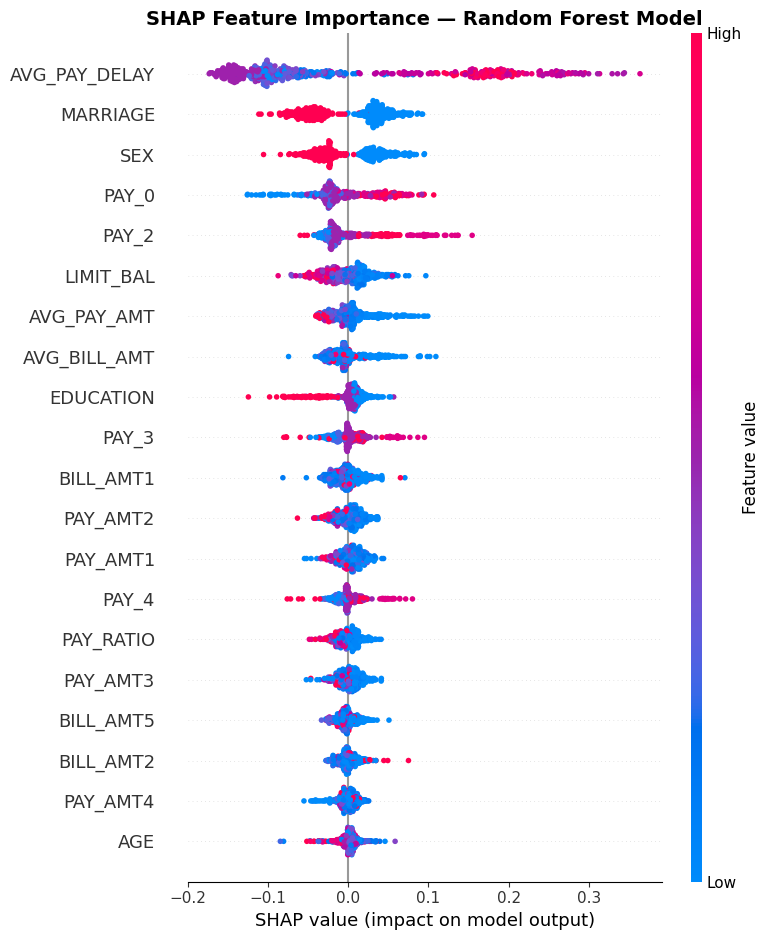

SHAP summary plot saved!


In [34]:
# SHAP Summary Plot
plt.figure(figsize=(12, 8))

shap.summary_plot(shap_values[:, :, 1],
                  X_test_scaled[:500],
                  feature_names=X.columns.tolist(),
                  show=False)

plt.title('SHAP Feature Importance — Random Forest Model',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('shap_summary.png', dpi=150, bbox_inches='tight')
plt.show()

print("SHAP summary plot saved!")

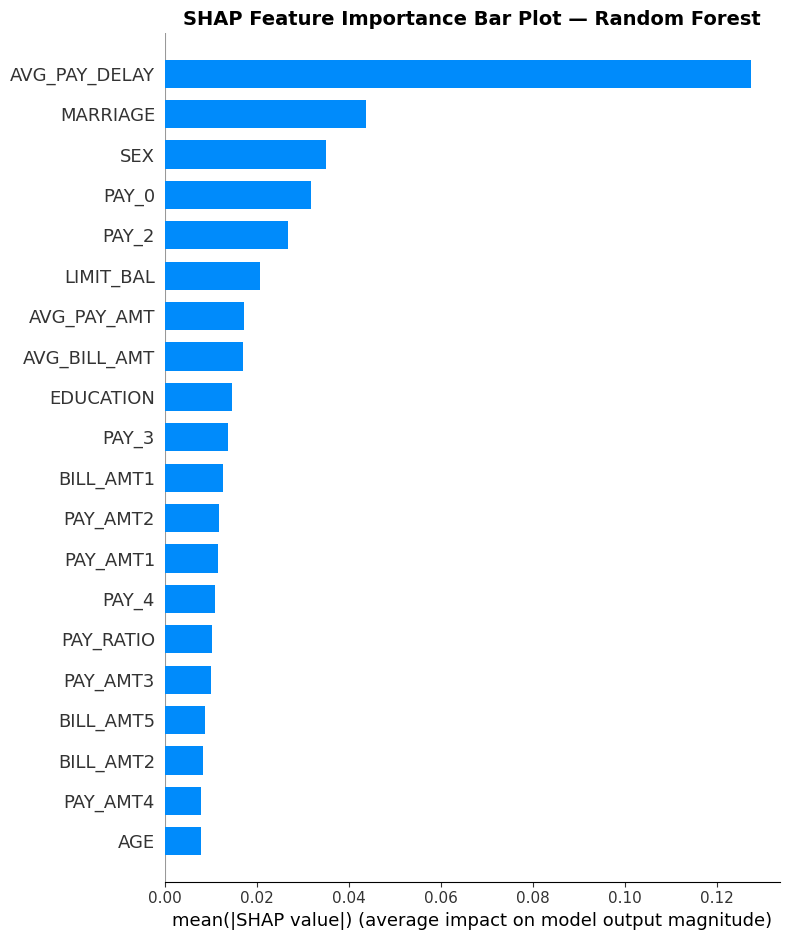

SHAP bar plot saved!


In [36]:
# SHAP Bar Plot - cleaner view of feature importance
plt.figure(figsize=(12, 8))

shap.summary_plot(shap_values[:, :, 1],
                  X_test_scaled[:500],
                  feature_names=X.columns.tolist(),
                  plot_type="bar",
                  show=False)

plt.title('SHAP Feature Importance Bar Plot — Random Forest',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('shap_bar.png', dpi=150, bbox_inches='tight')
plt.show()

print("SHAP bar plot saved!")

In [37]:
# Social Impact Analysis
print("=" * 60)
print("         SOCIAL IMPACT ANALYSIS")
print("=" * 60)

# Real model results
rf_accuracy = 0.862
rf_recall   = 0.832
rf_f1       = 0.858
rf_auc      = 0.931

# Population statistics
unbanked_world  = 1_400_000_000
unbanked_india  =   190_000_000
unbanked_africa =   350_000_000

# If we assess 10% of unbanked population
assessment_rate = 0.10

assessed_india  = unbanked_india  * assessment_rate
assessed_africa = unbanked_africa * assessment_rate

# Correctly assessed
correctly_assessed_india  = assessed_india  * rf_accuracy
correctly_assessed_africa = assessed_africa * rf_accuracy

# People who could get loans
loans_india  = assessed_india  * rf_recall
loans_africa = assessed_africa * rf_recall

print(f"\n=== GLOBAL STATISTICS ===")
print(f"Total Unbanked People Worldwide: {unbanked_world:,}")
print(f"Unbanked Adults in India:        {unbanked_india:,}")
print(f"Unbanked Adults in Africa:       {unbanked_africa:,}")

print(f"\n=== IF WE DEPLOY OUR MODEL ===")
print(f"Assessment Rate: 10%")
print(f"\nINDIA:")
print(f"  People Assessed:          {int(assessed_india):,}")
print(f"  Correctly Assessed:       {int(correctly_assessed_india):,}")
print(f"  Could Receive Loans:      {int(loans_india):,}")

print(f"\nAFRICA:")
print(f"  People Assessed:          {int(assessed_africa):,}")
print(f"  Correctly Assessed:       {int(correctly_assessed_africa):,}")
print(f"  Could Receive Loans:      {int(loans_africa):,}")

print(f"\n=== OUR MODEL PERFORMANCE ===")
print(f"Best Model:  Random Forest")
print(f"Accuracy:    {rf_accuracy*100:.1f}%")
print(f"Recall:      {rf_recall*100:.1f}%")
print(f"F1-Score:    {rf_f1*100:.1f}%")
print(f"AUC-ROC:     {rf_auc*100:.1f}%")

print(f"\n=== CONCLUSION ===")
print(f"Our Random Forest model can help")
print(f"extend financial access to millions")
print(f"of unbanked people worldwide!")
print(f"Without requiring traditional documents!")
print("=" * 60)

         SOCIAL IMPACT ANALYSIS

=== GLOBAL STATISTICS ===
Total Unbanked People Worldwide: 1,400,000,000
Unbanked Adults in India:        190,000,000
Unbanked Adults in Africa:       350,000,000

=== IF WE DEPLOY OUR MODEL ===
Assessment Rate: 10%

INDIA:
  People Assessed:          19,000,000
  Correctly Assessed:       16,378,000
  Could Receive Loans:      15,808,000

AFRICA:
  People Assessed:          35,000,000
  Correctly Assessed:       30,170,000
  Could Receive Loans:      29,120,000

=== OUR MODEL PERFORMANCE ===
Best Model:  Random Forest
Accuracy:    86.2%
Recall:      83.2%
F1-Score:    85.8%
AUC-ROC:     93.1%

=== CONCLUSION ===
Our Random Forest model can help
extend financial access to millions
of unbanked people worldwide!
Without requiring traditional documents!


In [38]:
# Threshold Analysis for Random Forest
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

thresholds = [0.50, 0.40, 0.30, 0.25, 0.20, 0.15, 0.10]

print("=== THRESHOLD ANALYSIS - RANDOM FOREST ===")
print(f"{'Threshold':<12} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1':<12}")
print("-" * 60)

for thresh in thresholds:
    y_pred_thresh = (rf_prob >= thresh).astype(int)
    acc  = round(accuracy_score(y_test, y_pred_thresh), 4)
    prec = round(precision_score(y_test, y_pred_thresh), 4)
    rec  = round(recall_score(y_test, y_pred_thresh), 4)
    f1   = round(f1_score(y_test, y_pred_thresh), 4)
    print(f"{thresh:<12} {acc:<12} {prec:<12} {rec:<12} {f1:<12}")

=== THRESHOLD ANALYSIS - RANDOM FOREST ===
Threshold    Accuracy     Precision    Recall       F1          
------------------------------------------------------------
0.5          0.8619       0.8795       0.8386       0.8586      
0.4          0.851        0.8221       0.8958       0.8573      
0.3          0.8013       0.7374       0.936        0.8249      
0.25         0.7628       0.6894       0.9566       0.8013      
0.2          0.7119       0.6392       0.9728       0.7715      
0.15         0.6507       0.5904       0.9835       0.7379      
0.1          0.5867       0.5478       0.9934       0.7062      


In [39]:
# Scalability Analysis
import time

fractions = [0.20, 0.40, 0.60, 0.80, 1.00]

print("=== SCALABILITY ANALYSIS ===")
print(f"{'Data Fraction':<15} {'Training Samples':<20} {'Train Time (s)':<18} {'ROC-AUC':<10}")
print("-" * 65)

for frac in fractions:
    # Get fraction of training data
    size = int(len(X_train_scaled) * frac)
    X_frac = X_train_scaled[:size]
    y_frac = y_train[:size]

    # Train and time
    rf_frac = RandomForestClassifier(n_estimators=100,
                                      random_state=42,
                                      n_jobs=-1)
    start = time.time()
    rf_frac.fit(X_frac, y_frac)
    end = time.time()

    train_time = round(end - start, 2)

    # Evaluate
    prob_frac = rf_frac.predict_proba(X_test_scaled)[:, 1]
    auc = round(roc_auc_score(y_test, prob_frac), 4)

    print(f"{frac:<15} {size:<20} {train_time:<18} {auc:<10}")

=== SCALABILITY ANALYSIS ===
Data Fraction   Training Samples     Train Time (s)     ROC-AUC   
-----------------------------------------------------------------
0.2             7476                 4.3                0.8849    
0.4             14952                8.82               0.9057    
0.6             22429                8.04               0.9173    
0.8             29905                12.55              0.9257    
1.0             37382                15.88              0.9308    


In [40]:
# Fairness Analysis across Gender and Education groups
print("=== FAIRNESS ANALYSIS ===")

# Get original test indices
X_test_orig = X_test.copy()

print("\n--- Gender Fairness (1=Male, 2=Female) ---")
print(f"{'Gender':<10} {'Samples':<10} {'Recall':<10} {'Precision':<12} {'ROC-AUC':<10}")
print("-" * 55)

for gender in [1, 2]:
    mask = X_test_orig['SEX'] == gender
    if mask.sum() > 0:
        y_true_g = y_test[mask]
        y_pred_g = rf_pred[mask]
        y_prob_g = rf_prob[mask]
        rec  = round(recall_score(y_true_g, y_pred_g), 3)
        prec = round(precision_score(y_true_g, y_pred_g), 3)
        auc  = round(roc_auc_score(y_true_g, y_prob_g), 3)
        label = "Male" if gender == 1 else "Female"
        print(f"{label:<10} {mask.sum():<10} {rec:<10} {prec:<12} {auc:<10}")

print("\n--- Education Fairness ---")
print(f"{'Education':<15} {'Samples':<10} {'Recall':<10} {'Precision':<12} {'ROC-AUC':<10}")
print("-" * 60)

edu_labels = {1: 'Graduate', 2: 'University', 3: 'High School', 4: 'Others'}
for edu in [1, 2, 3, 4]:
    mask = X_test_orig['EDUCATION'] == edu
    if mask.sum() > 0:
        y_true_e = y_test[mask]
        y_pred_e = rf_pred[mask]
        y_prob_e = rf_prob[mask]
        rec  = round(recall_score(y_true_e, y_pred_e), 3)
        prec = round(precision_score(y_true_e, y_pred_e), 3)
        auc  = round(roc_auc_score(y_true_e, y_prob_e), 3)
        print(f"{edu_labels[edu]:<15} {mask.sum():<10} {rec:<10} {prec:<12} {auc:<10}")

=== FAIRNESS ANALYSIS ===

--- Gender Fairness (1=Male, 2=Female) ---
Gender     Samples    Recall     Precision    ROC-AUC   
-------------------------------------------------------
Male       4666       0.879      0.911        0.941     
Female     4680       0.759      0.846        0.912     

--- Education Fairness ---
Education       Samples    Recall     Precision    ROC-AUC   
------------------------------------------------------------
Graduate        3598       0.851      0.917        0.941     
University      4466       0.841      0.878        0.93      
High School     1196       0.716      0.805        0.885     
Others          86         0.222      0.4          0.867     
